In [1]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

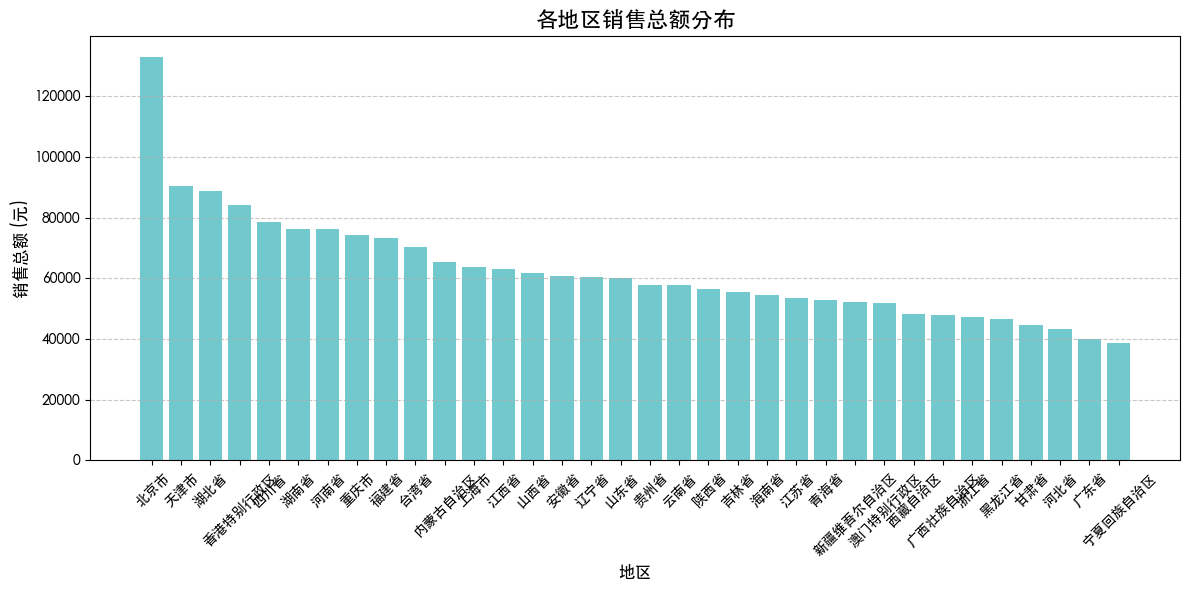

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

users = pd.read_csv("user_unique_compare.csv")
orders = pd.read_csv("erp_order.csv")

# 合并订单与用户信息
merged = pd.merge(orders, users, on="user_id", how="left")

# 计算各地区销售总额
region_sales = merged.groupby("region")["total_amount"].sum().reset_index()
region_sales = region_sales.sort_values(by="total_amount", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(region_sales["region"], region_sales["total_amount"], color="#71c9ce")
plt.title("各地区销售总额分布", fontsize=16)
plt.xlabel("地区", fontsize=12)
plt.ylabel("销售总额 (元)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

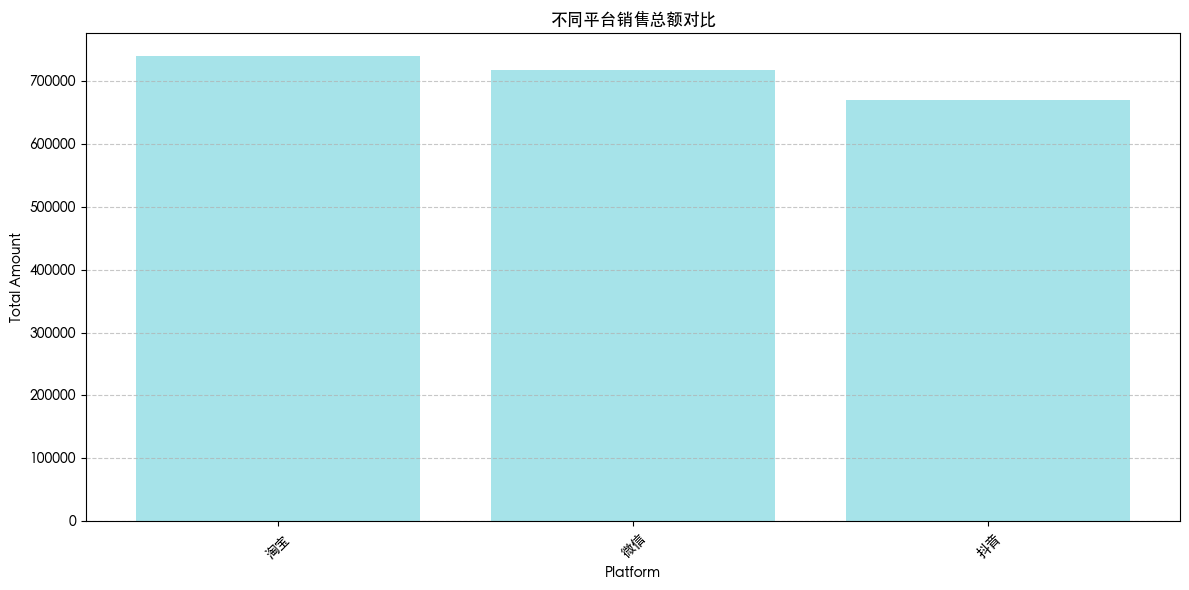

In [ ]:
# 计算不同平台的销售总额
platform_sales = merged.groupby("platform")["total_amount"].sum().reset_index()
platform_sales = platform_sales.sort_values(by="total_amount", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(
    platform_sales["platform"], 
    platform_sales["total_amount"], 
    color="#a6e3e9"
    )
    
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("不同平台销售总额对比")
plt.xlabel("Platform")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

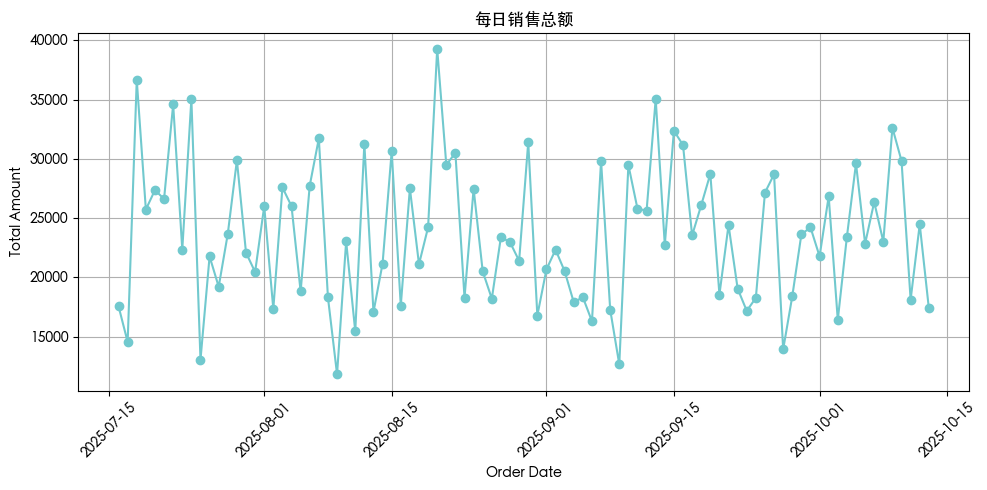

In [ ]:
# 计算每日销售总额
orders['order_date'] = pd.to_datetime(orders['order_date'])

orders = orders.sort_values('order_date')

daily_orders = orders.groupby('order_date')['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(
    daily_orders['order_date'], 
    daily_orders['total_amount'], 
    marker='o', 
    color = '#71c9ce'
    )
    
plt.title('每日销售总额')
plt.xlabel('Order Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

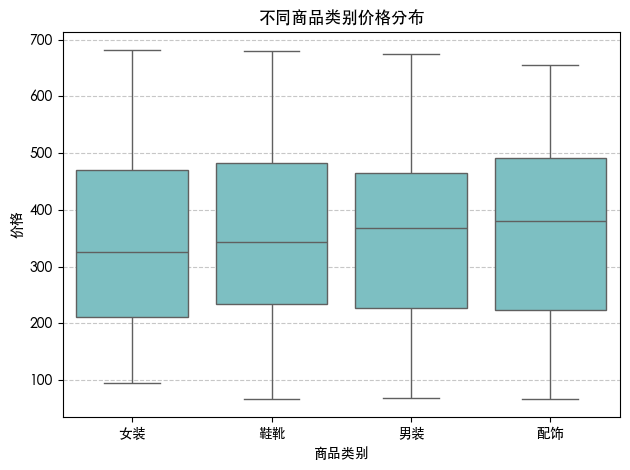

In [ ]:
import seaborn as sns

sku_data_base = pd.read_csv("sku_data_base.csv")

sns.boxplot(
    x="category", 
    y="price", 
    data=sku_data_base, 
    color="#71c9ce"
    )
    
plt.title("不同商品类别价格分布")
plt.xlabel("商品类别")
plt.ylabel("价格")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
spu_manages_feishu = pd.read_csv("spu_manages_feishu.csv")

sku_spu_merged = pd.merge(spu_manages_feishu, sku_data_base, on="spu", how="left")

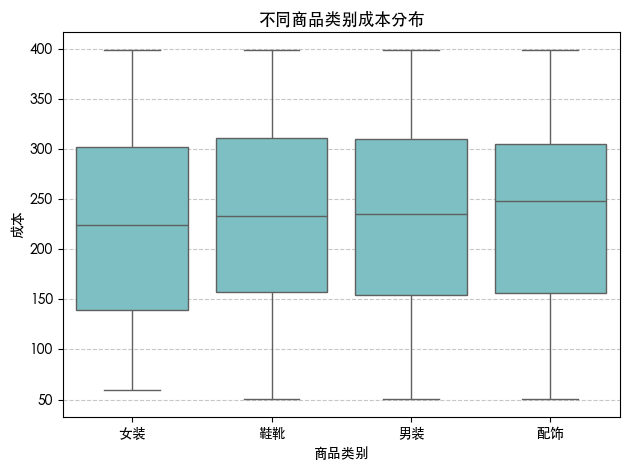

In [ ]:
sns.boxplot(
    x = 'category', 
    y = 'cost', 
    data = sku_spu_merged, 
    color="#71c9ce"
    )
    
plt.title("不同商品类别成本分布")
plt.xlabel("商品类别")
plt.ylabel("成本")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

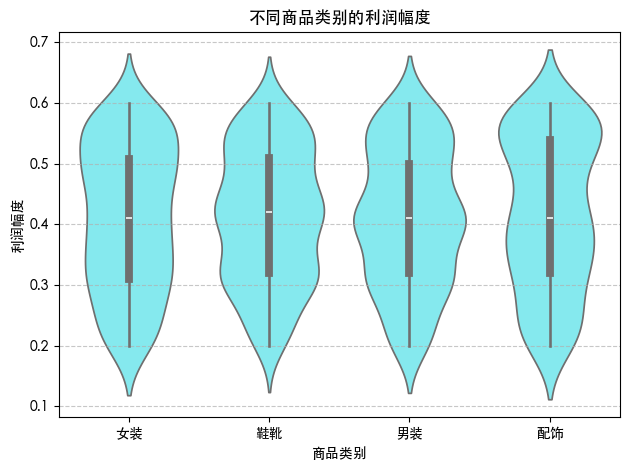

In [37]:
sns.violinplot(
    x = 'category', 
    y = 'profit_margin', 
    data = sku_spu_merged, 
    color="#74f9ff"
    )
    
plt.title("不同商品类别的利润幅度")
plt.xlabel("商品类别")
plt.ylabel("利润幅度")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

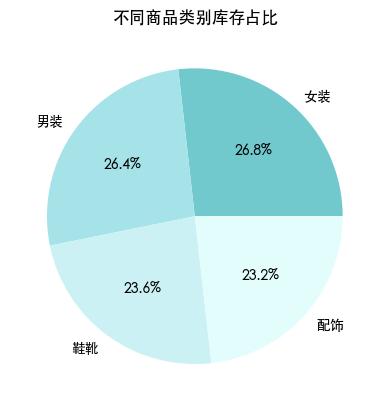

In [ ]:
colors = ['#71c9ce', '#a6e3e9', '#cbf1f5', '#e3fdfd']

plt.pie(
    sku_spu_merged['category'].value_counts(), 
    labels=sku_spu_merged['category'].value_counts().index, 
    colors = colors,
    autopct='%1.1f%%'
    )

plt.title("不同商品类别库存占比")
plt.show()

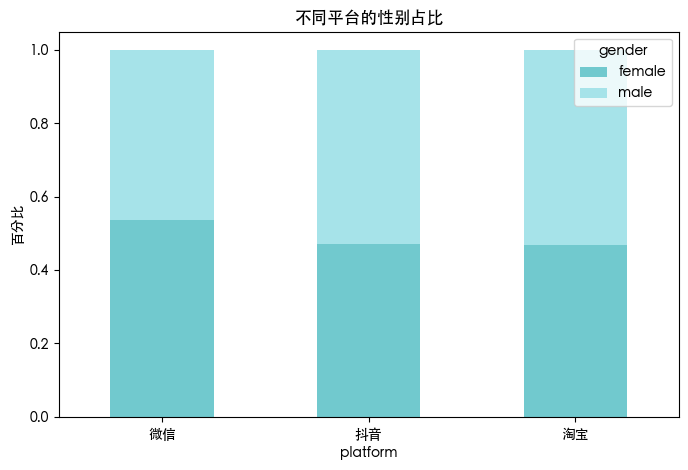

In [ ]:
counts = users.groupby(['platform', 'gender']).size().unstack()
counts_pct = counts.div(counts.sum(axis=1), axis=0)

counts_pct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8,5),
    color=["#71c9ce", "#a6e3e9"]
    )
    
plt.ylabel('百分比')
plt.title('不同平台的性别占比')
plt.xticks(rotation=0)
plt.show()

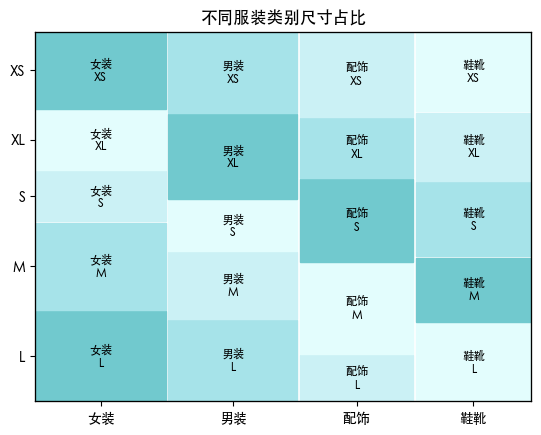

In [47]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

color_list = ["#71c9ce", "#a6e3e9", "#cbf1f5", "#e3fdfd"]
color_dict = {k: color_list[i % len(color_list)] for i, k in enumerate(data.index)}

data = sku_data_base.groupby(['category', 'size']).size()
mosaic(data, properties=lambda key: {'color': color_dict[key]})
plt.title('不同服装类别尺寸占比')
plt.show()

<Figure size 1200x600 with 0 Axes>

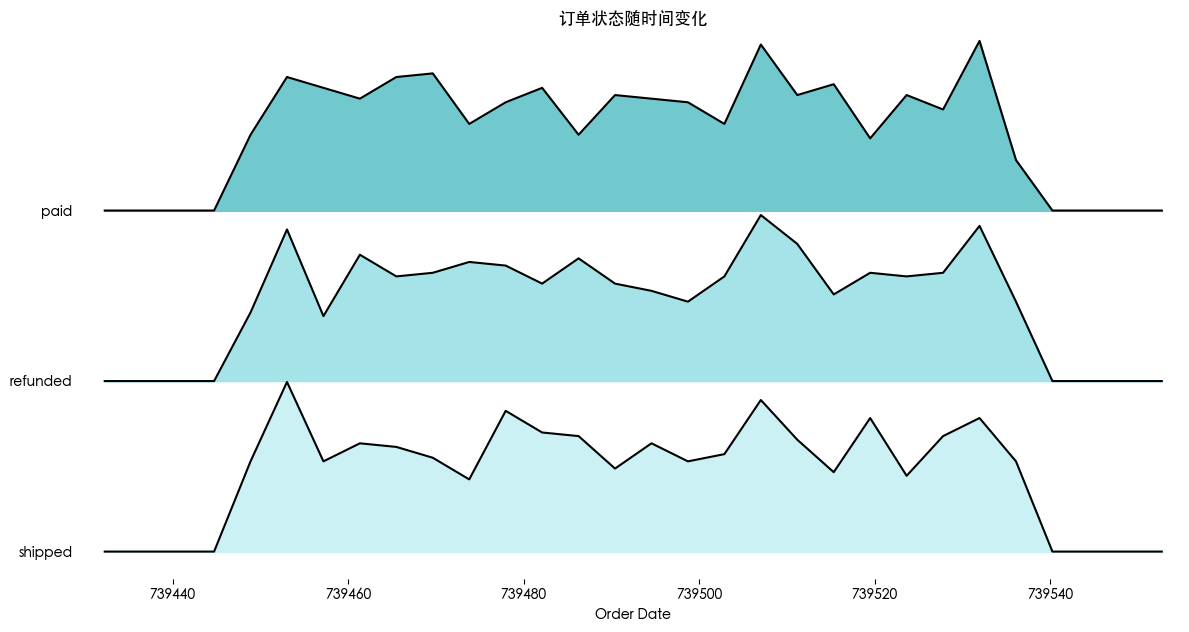

In [ ]:
import matplotlib.pyplot as plt
from joypy import joyplot
import pandas as pd

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['date_num'] = orders['order_date'].map(pd.Timestamp.toordinal)

plt.figure(figsize=(12,6))
joyplot(
    data=orders,
    by='status',
    column='date_num',
    overlap=0.5,
    kind='counts', 
    bins=30,
    color=["#71c9ce", "#a6e3e9", "#cbf1f5"],
    figsize=(12,6)
)
plt.xlabel('Order Date')
plt.ylabel('Status')
plt.title('订单状态随时间变化')
plt.show()

/var/folders/yt/dl86x1493y18124bcx2hmh780000gn/T/ipykernel_44546/3630690652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


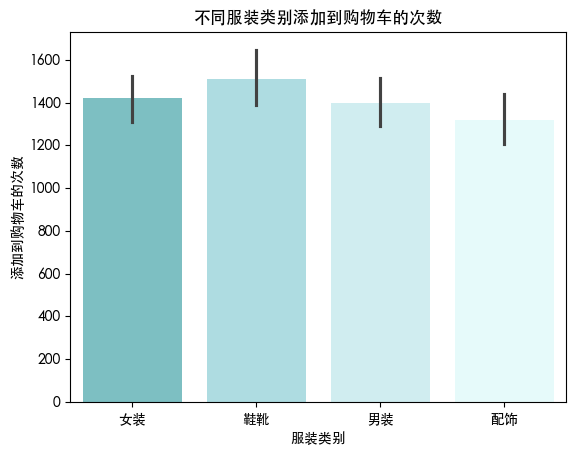

In [63]:
new_sku_sales = pd.read_csv("new_sku_sales.csv")
sku_data_base = pd.read_csv("sku_data_base.csv")

new_sku_merged = pd.merge(new_sku_sales, sku_data_base, on='sku', how='left')

sns.barplot(
    data=new_sku_merged,
    x='category',
    y='add_to_cart',
    palette = ['#71c9ce', '#a6e3e9', '#cbf1f5', '#e3fdfd']
)
plt.title('不同服装类别添加到购物车的次数')
plt.xlabel('服装类别')
plt.ylabel('添加到购物车的次数')
plt.show()

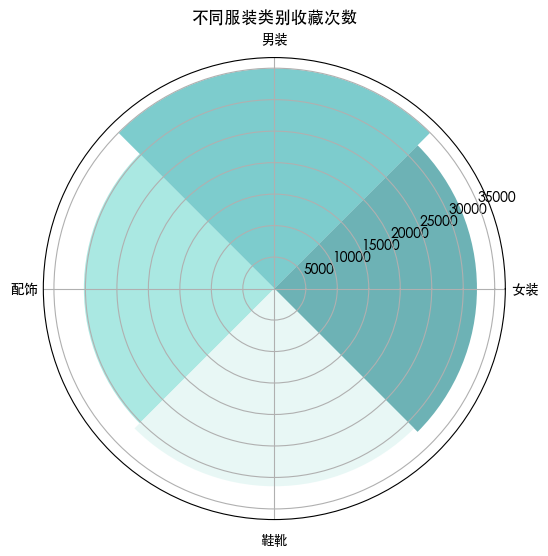

In [72]:
import numpy as np

category_counts = new_sku_merged.groupby('category')['favorite'].sum()
labels = category_counts.index
sizes = category_counts.values

theta = np.linspace(0.0, 2 * np.pi, len(labels), endpoint=False)
radii = sizes
width = 2 * np.pi / len(labels)

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
bars = ax.bar(
    theta, 
    radii, 
    width=width, 
    bottom=0.0, 
    color=['#2f9296', '#46b7b9', '#87dfd6', '#dff5f2'], 
    alpha=0.7
    )

ax.set_xticks(theta)
ax.set_xticklabels(labels)
plt.title('不同服装类别收藏次数')
plt.show()

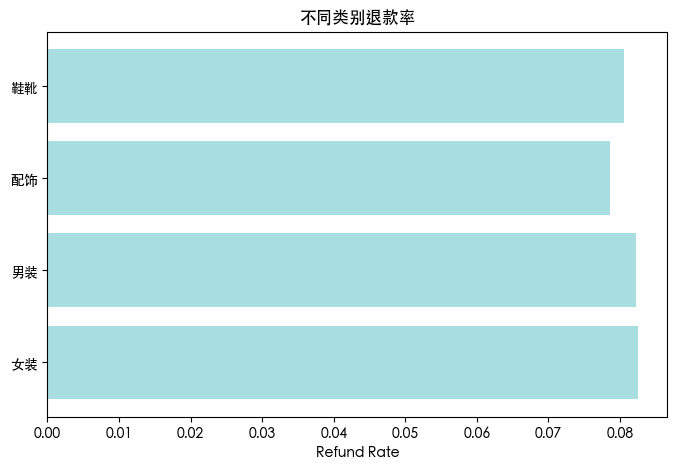

In [ ]:
category_refund = new_sku_merged.groupby('category')['refund_rate'].mean().reset_index()

plt.figure(figsize=(8,5))
bars = plt.barh(category_refund['category'], category_refund['refund_rate'], color='#71c9ce', alpha=0.6)
plt.xlabel('Refund Rate')
plt.title('不同类别退款率')
plt.show()

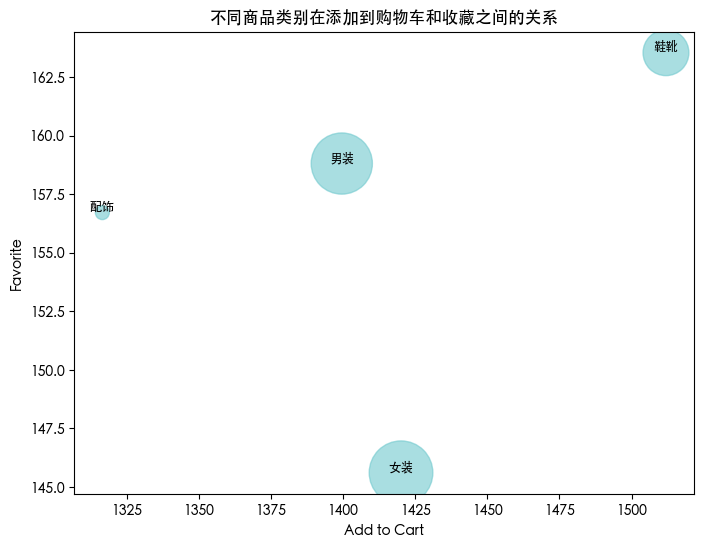

In [89]:
import numpy as np

sizes = (category_stats['refund_rate'] - category_stats['refund_rate'].min()) / \
        (category_stats['refund_rate'].max() - category_stats['refund_rate'].min())
sizes = sizes * 2000 + 100

plt.figure(figsize=(8,6))
plt.scatter(
    category_stats['add_to_cart'],
    category_stats['favorite'],
    s=sizes,
    alpha=0.6,
    color='#71c9ce'
)
for i, row in category_stats.iterrows():
    plt.text(row['add_to_cart'], row['favorite'], row['category'], fontsize=9, ha='center', va='bottom')
plt.xlabel('Add to Cart')
plt.ylabel('Favorite')
plt.title('不同商品类别在添加到购物车和收藏之间的关系')
plt.show()

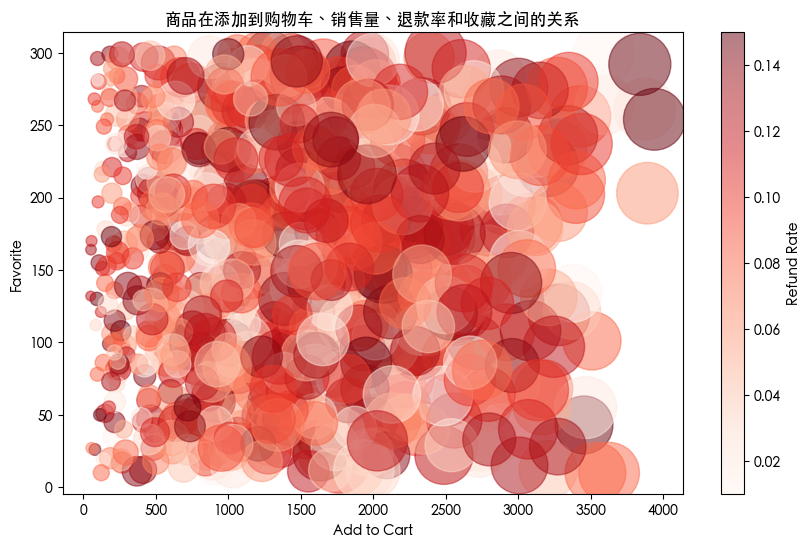

In [95]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    new_sku_sales[['add_to_cart']], 
    new_sku_sales[['favorite']],
    s=new_sku_sales['sales'],
    c=new_sku_sales['refund_rate'],
    cmap='Reds', alpha=0.5
)
plt.xlabel('Add to Cart')
plt.ylabel('Favorite')
plt.title('商品在添加到购物车、销售量、退款率和收藏之间的关系')
plt.colorbar(scatter, label='Refund Rate')
plt.show()

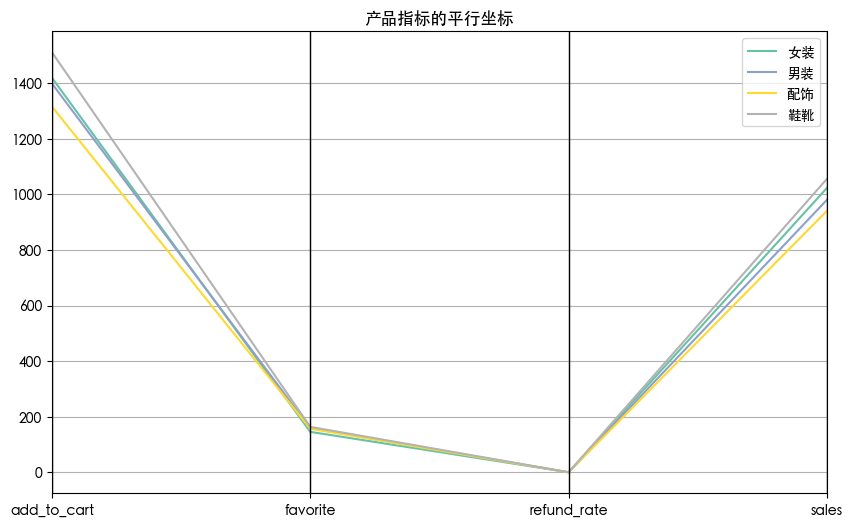

In [98]:
category_stats = new_sku_merged.groupby('category')[['add_to_cart','favorite','refund_rate','sales']].mean().reset_index()

plt.figure(figsize=(10,6))
parallel_coordinates(
    category_stats,
    class_column='category',
    colormap=plt.get_cmap("Set2")
)
plt.title('产品指标的平行坐标')
plt.show()

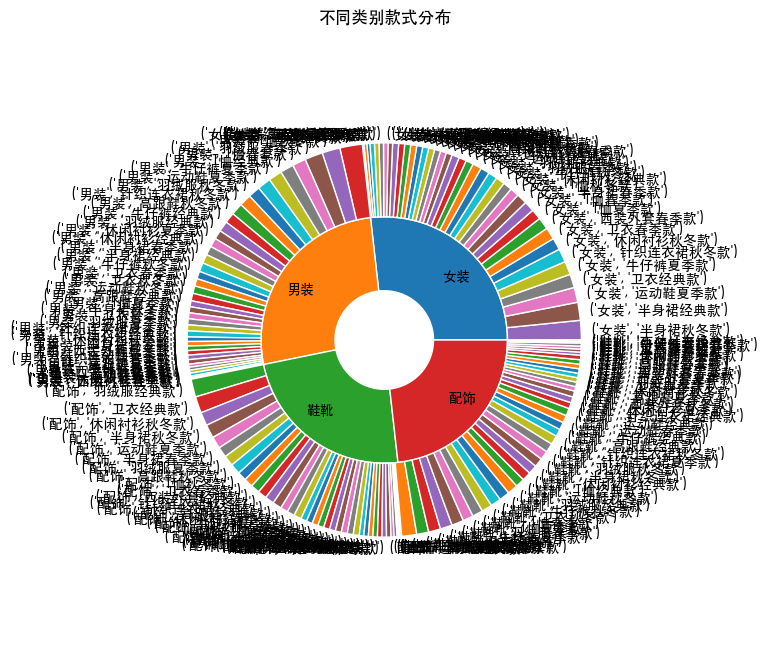

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

category_counts = sku_data_base['category'].value_counts()
style_counts = sku_data_base.groupby('category')['name'].value_counts()

inner_sizes = category_counts.values
inner_labels = category_counts.index

outer_sizes = style_counts.values
outer_labels = style_counts.index

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(inner_sizes, radius=0.5, labels=inner_labels, labeldistance=0.7, wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(outer_sizes, radius=0.8, labels=outer_labels, labeldistance=1.05, wedgeprops=dict(width=0.3, edgecolor='w'))

plt.title("不同类别款式分布")
plt.show()

In [ ]:
import plotly.express as px

fig = px.sunburst(
    sku_data_base,
    path=['category','name'],
    values=None,
    color='category',
    title="不同类别款式分布"
)
fig.show()

In [115]:
import plotly.express as px

fig = px.treemap(
    sku_data_base,
    path=['category','name'],
    values=None,
    color='category',
    title="不同类别款式分布"
)
fig.show()

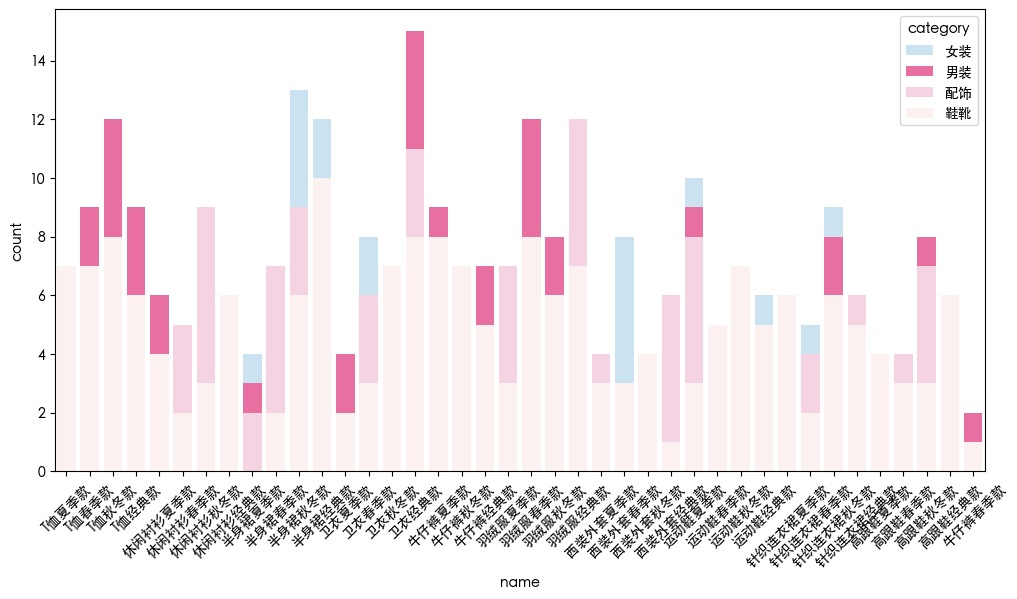

In [120]:
category_style_counts = sku_data_base.groupby(['category','name']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(
    data=category_style_counts,
    x='name',
    y='count',
    hue='category',
    dodge=False,
    palette = ['#c5e3f6', '#fc5c9c', '#fccde2', '#fcefee']
)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.graph_objects as go

# 统计每个 category-name 的数量
category_counts = sku_data_base.groupby(['category','name']).size().reset_index(name='count')

# 节点标签
categories = list(category_counts['category'].unique())
names = list(category_counts['name'].unique())
labels = categories + names

source_indices = category_counts['category'].apply(lambda x: categories.index(x))
target_indices = category_counts['name'].apply(lambda x: names.index(x) + len(categories))  # name 索引要加类别长度

values = category_counts['count']

fig = go.Figure(go.Sankey(
    node=dict(
        label=labels,
        pad=15,
        thickness=20,
        color=["skyblue"]*len(categories) + ["lightgreen"]*len(names)
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

fig.update_layout(title_text="类别到款式的数量流", font_size=12)
fig.show()

In [ ]:
import plotly.graph_objects as go

progress = 72

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = progress,
    delta = {'reference': 100, 'increasing': {'color': "RebeccaPurple"}},
    gauge = {
        'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "#71c9ce"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 50], 'color': '#e3fdfd'},
            {'range': [50, 80], 'color': '#a6e3e9'},
            {'range': [80, 100], 'color': '#71c9ce'}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': progress
        }
    },
    title = {'text': "任务完成率"}
))

fig.update_layout(
    paper_bgcolor="white",
    font={'color': "darkblue", 'family': "Arial"},
    height=400,
    width=500
)
fig.show()

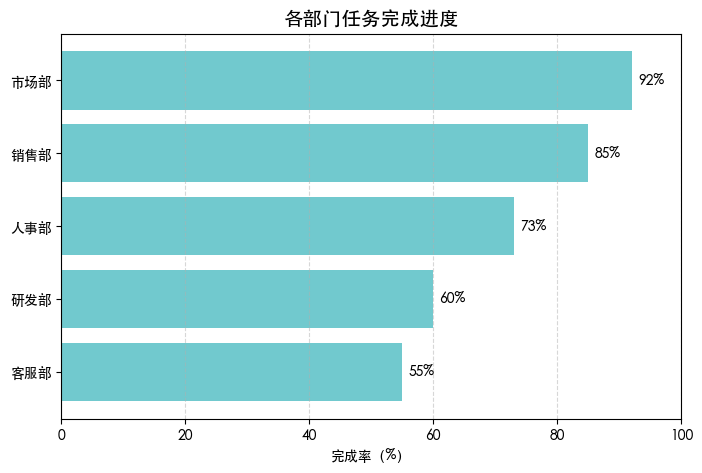

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    'department': ['销售部', '研发部', '市场部', '人事部', '客服部'],
    'progress': [85, 60, 92, 73, 55]
})

data = data.sort_values('progress')

plt.figure(figsize=(8, 5))
bars = plt.barh(data['department'], data['progress'], color='#71c9ce')

for bar, value in zip(bars, data['progress']):
    plt.text(value + 1, bar.get_y() + bar.get_height()/2, f'{value}%', va='center')

plt.title('各部门任务完成进度', fontsize=14)
plt.xlabel('完成率（%）')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [5]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    'month': ['1月','1月','1月','2月','2月','2月','3月','3月','3月'],
    'department': ['销售部','研发部','市场部']*3,
    'progress': [60,45,55,70,65,60,85,80,75]
})

fig = px.bar(
    data,
    x='progress',
    y='department',
    animation_frame='month',
    orientation='h',
    range_x=[0,100],
    color='progress',
    color_continuous_scale='Blues',
    text='progress',
    title='各部门任务完成竞速图'
)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

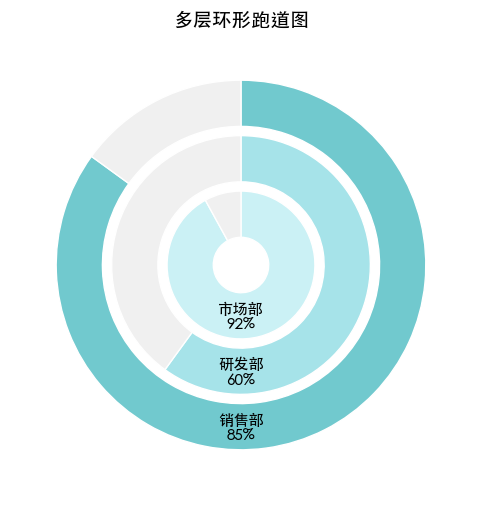

In [8]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['销售部', '研发部', '市场部']
progress = [85, 60, 92]
colors = ['#71c9ce', '#a6e3e9', '#cbf1f5']

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

radii = [1.0, 0.7, 0.4]
for r, p, c, l in zip(radii, progress, colors, labels):
    ax.pie(
        [p, 100-p],
        radius=r,
        startangle=90,
        colors=[c, '#f0f0f0'],
        counterclock=False,
        wedgeprops=dict(width=0.25, edgecolor='white')
    )
    ax.text(0, -r + 0.12, f"{l}\n{p}%", ha='center', va='center', fontsize=11)

plt.title("多层环形跑道图", fontsize=14)
plt.show()

In [11]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    'department': ['销售部', '研发部', '市场部', '人事部', '客服部'],
    'progress': [85, 60, 92, 73, 55]
})

fig = px.bar(
    data,
    x='progress',
    y='department',
    orientation='h',
    text='progress',
    color='progress',
    color_continuous_scale=['#a6e3e9', '#71c9ce', '#2a9d8f'],
    title='各部门任务完成情况'
)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(xaxis=dict(range=[0,100]), yaxis_title=None)
fig.show()